In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
DATA_DIR = "./datasets"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, 'train')
VAL_IMAGE_DIR = os.path.join(DATA_DIR, 'val')

# Data exploration

## Class distribution

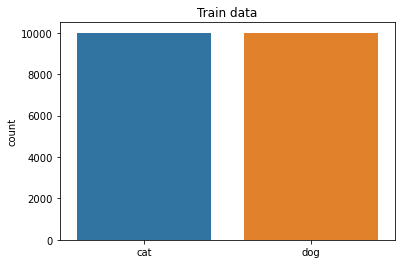

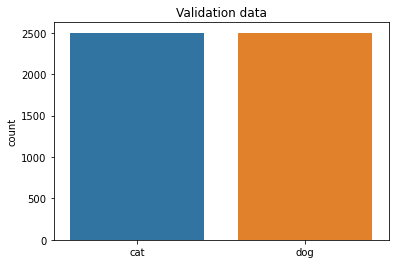

In [24]:
def plot_image_count(title, image_dir):
    labels = []
    for label in os.listdir(image_dir):
        for img in os.listdir(os.path.join(image_dir, label)):
            labels.append(img.split('.')[0])
    sns.countplot(labels)
    plt.title(title)
    plt.show()
    
plot_image_count('Train data', TRAIN_IMAGE_DIR)
plot_image_count('Validation data', VAL_IMAGE_DIR)

## Image samples

In [15]:
%matplotlib inline

nrows = 4
ncols = 4
index = 0 

train_cats_dir = os.path.join(TRAIN_IMAGE_DIR, 'cat')
train_dogs_dir = os.path.join(TRAIN_IMAGE_DIR, 'dog')

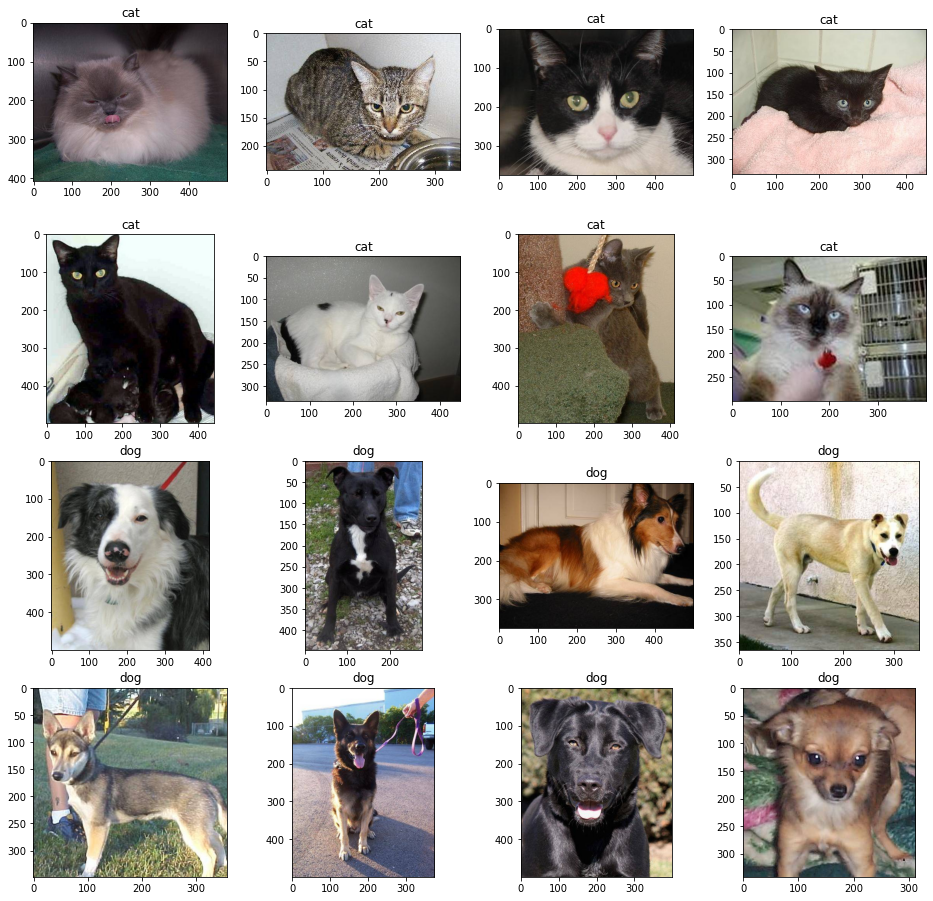

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

index += 8

cat_images = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[index-8:index] 
              ]

dog_images = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[index-8:index]
               ]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.title(img_path.split('.')[1].split('/')[-2])
    plt.imshow(img)

plt.show()

# Image transformation

In [26]:
import numpy as np
from torchvision import transforms

In [5]:
IMAGE_SIZE = (224, 224)

In [6]:
transformation = transforms.Compose([transforms.ToTensor(), 
                                     transforms.RandomHorizontalFlip(p=0.5), 
                                     transforms.RandomRotation(degrees=45), 
                                     transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                     transforms.Resize(IMAGE_SIZE)])

In [13]:
nrows = 4
ncols = 4
index = 0 

train_cats_dir = os.path.join(TRAIN_IMAGE_DIR, 'cat')
train_dogs_dir = os.path.join(TRAIN_IMAGE_DIR, 'dog')

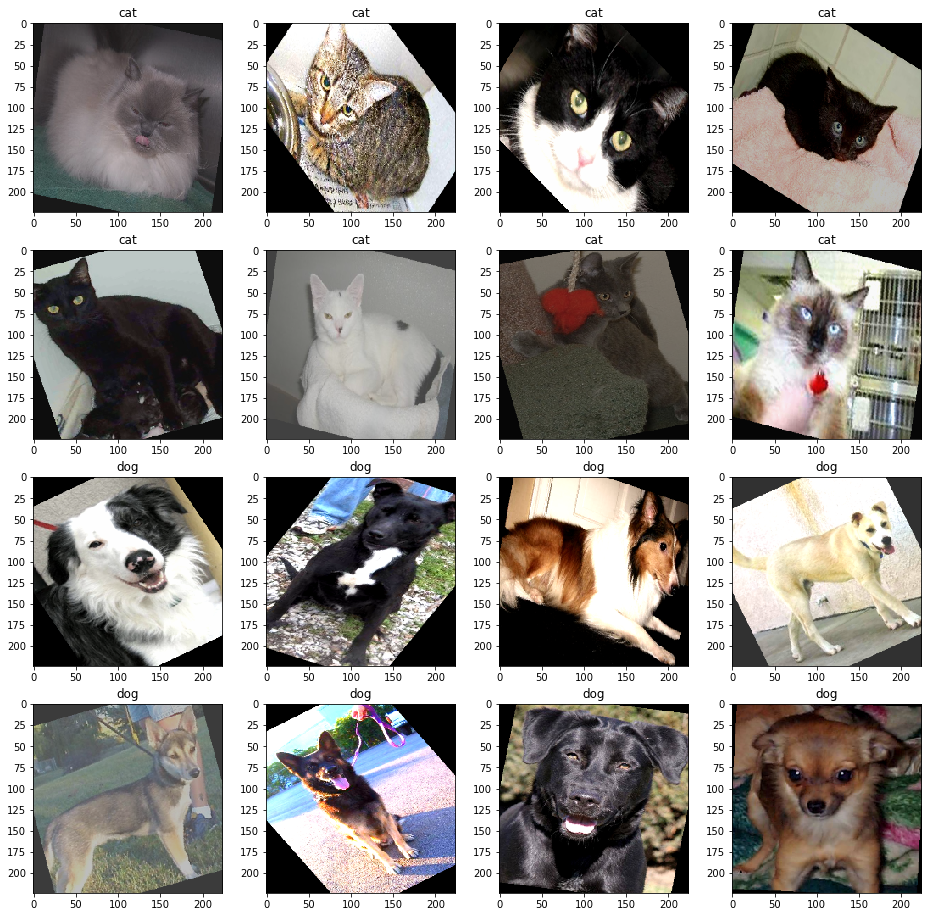

In [14]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

index += 8

cat_images = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[index-8:index] 
              ]

dogs_images = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[index-8:index]
               ]

for i, img_path in enumerate(cat_images + dogs_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    transformed_img = transformation(img).numpy()
    plt.title(img_path.split('.')[1].split('/')[-2])
    plt.imshow(np.transpose(transformed_img, (1,2,0)), interpolation='nearest')

plt.show()

# Check reproducibility of dataloader and random transformation

In [37]:
import torch

In [5]:
run1 = torch.load('./scripts/batch_tensor_1.pt')
run2 = torch.load('./scripts/batch_tensor_2.pt')

In [14]:
torch.equal(run1[0][0], run2[0][0])

True

In [15]:
torch.equal(run1[1][0], run2[1][0])

True

In [16]:
torch.equal(run1[2][0], run2[2][0])

True

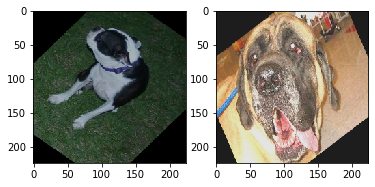

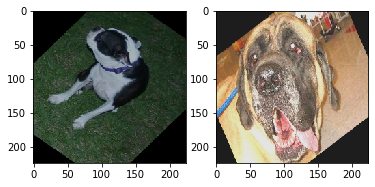

In [34]:
for i, img in enumerate(run1[0][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[0][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

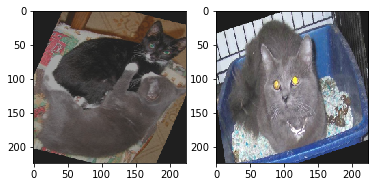

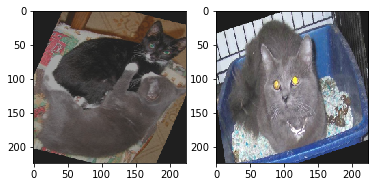

In [35]:
for i, img in enumerate(run1[1][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[1][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

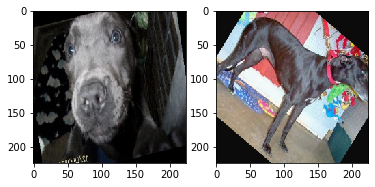

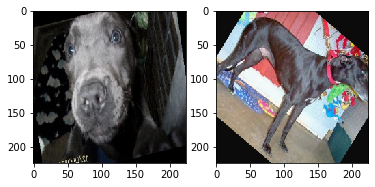

In [36]:
for i, img in enumerate(run1[2][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[2][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

# Loss and acc plots

In [34]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

In [5]:
log_df = pd.read_csv('./models/resnet50_lr_0.0001_augment/log.csv')
log_df

epoch  train_loss  train_acc  val_loss  val_acc
0      1     0.11066     0.9699   0.06638   0.9886
1      2     0.09874     0.9742   0.06713   0.9888
2      3     0.09828     0.9748   0.07014   0.9878
3      4     0.09776     0.9739   0.06837   0.9886
4      5     0.09566     0.9758   0.06780   0.9890
5      6     0.10072     0.9722   0.06620   0.9892
6      7     0.10001     0.9729   0.06575   0.9890
7      8     0.09579     0.9760   0.06824   0.9884
8      9     0.09869     0.9746   0.06783   0.9888
9     10     0.09856     0.9744   0.06731   0.9882

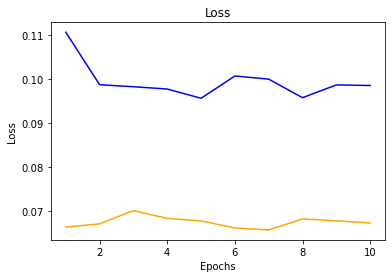

In [12]:
plt.title("Loss")
plt.plot(np.arange(1, 11, 1), log_df['train_loss'], color = "blue")
plt.plot(np.arange(1, 11, 1), log_df['val_loss'], color = "orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

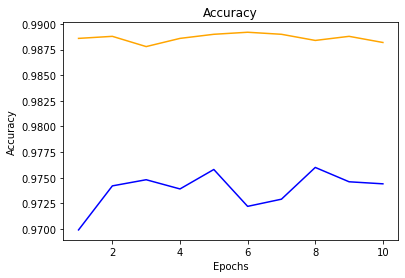

In [13]:
plt.title("Accuracy")
plt.plot(np.arange(1, 11, 1), log_df['train_acc'], color = "blue")
plt.plot(np.arange(1, 11, 1), log_df['val_acc'], color = "orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [35]:
def plot_graphs(log_file_path):
    log_df = pd.read_csv(log_file_path)
    
    fig = plt.gcf()
    fig.set_size_inches(15, 5)

    subplot = plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(np.arange(1, 11, 1), log_df['train_loss'], color = "blue")
    plt.plot(np.arange(1, 11, 1), log_df['val_loss'], color = "orange")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]
    plt.legend(custom_lines, ['train', 'val'])
    
    subplot = plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(np.arange(1, 11, 1), log_df['train_acc'], color = "blue")
    plt.plot(np.arange(1, 11, 1), log_df['val_acc'], color = "orange")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]
    plt.legend(custom_lines, ['train', 'val'])
    
    plt.savefig('loss_acc.png')

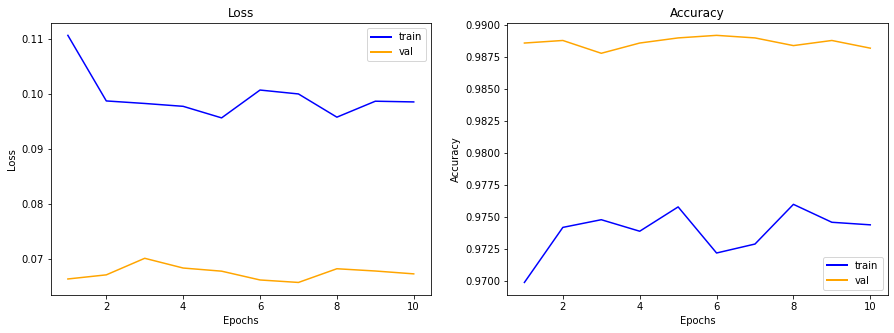

In [36]:
plot_graphs('./models/resnet50_lr_0.0001_augment/log.csv')

In [44]:
run1 = torch.load('./scripts/batch_tensor.pt')

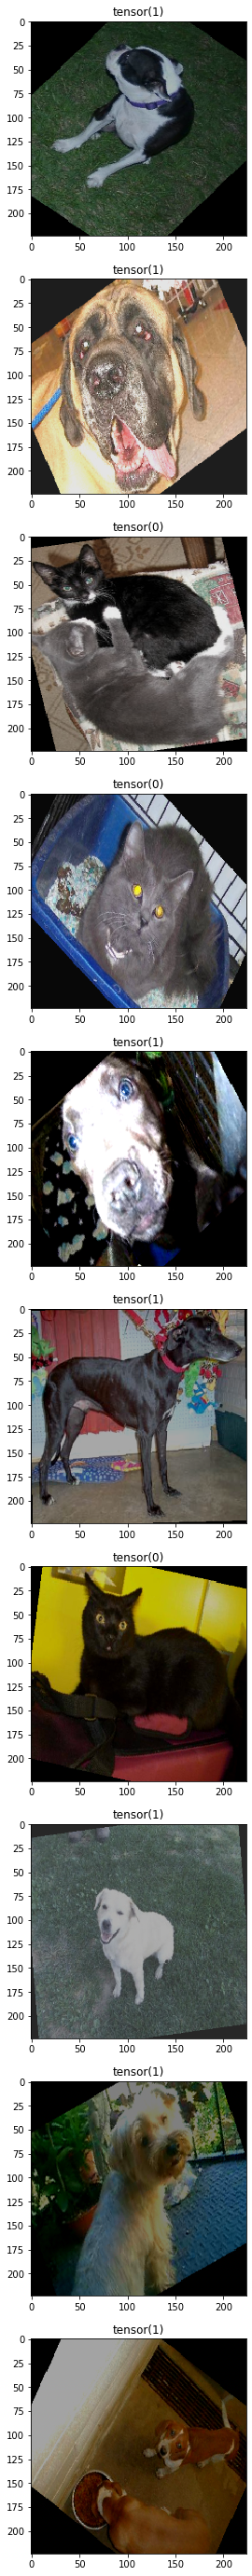

In [48]:
f, ax = plt.subplots(10, 1, figsize=(5, 5 * 10))

for i in range(10):
    img = run1[0][0][i]
    label = run1[0][1][i]
    ax[i].imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
    ax[i].set_title(label)

# for i, img in enumerate(run1[2][0]):
#     sp = plt.subplot(1, 2, i+1)
#     plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
# plt.show()

# for i, img in enumerate(run2[2][0]):
#     sp = plt.subplot(1, 2, i+1)
#     plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()